# Milestone P3

# Milestone Objectives

- Execute the project: single final notebook (main logic), helpers python file (implementations functions).

- Write a data story

- Update README: details the contributions of all group members.

[Milestone P3 briefing](https://epfl-ada.github.io/teaching/fall2023/cs401/projects/#p3-final-project-and-the-datastory)

In [2]:
from helpers import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from implementations import *

## MEHDI

# Award dataset

In [3]:
DATA_PATH = '../data'
AWARDS_PATH = '/awards/oscars.csv'

In [4]:
awards = pd.read_csv(DATA_PATH+AWARDS_PATH).rename(columns={'year_film': 'year', 'category': 'cat_nominated', 'name': 'name_nominated', 'film': 'name'})
display(awards.sample(5))
display(awards.shape)
display(awards.info())

,year,year_ceremony,ceremony,cat_nominated,name_nominated,name,winner
8917,2008,2009,81,ACTRESS IN A LEADING ROLE,Melissa Leo,Frozen River,False
7202,1992,1993,65,VISUAL EFFECTS,"Ken Ralston, Doug Chiang, Doug Smythe, Tom Woo...",Death Becomes Her,True
5051,1972,1973,45,MUSIC (Scoring: Adaptation and Original Song S...,Adaptation Score by Gil Askey,Lady Sings the Blues,False
2267,1948,1949,21,SPECIAL EFFECTS,"Special Visual Effects by Paul Eagler, J. McMi...",Portrait of Jennie,True
9930,2016,2017,89,DOCUMENTARY (Feature),"Raoul Peck, Rémi Grellety and Hébert Peck",I Am Not Your Negro,False


(10765, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            10765 non-null  int64 
 1   year_ceremony   10765 non-null  int64 
 2   ceremony        10765 non-null  int64 
 3   cat_nominated   10765 non-null  object
 4   name_nominated  10761 non-null  object
 5   name            10450 non-null  object
 6   winner          10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


None

In [5]:
# Get rid of missing name rows

awards_clean = awards.copy()
awards_clean = awards.loc[~awards['name'].isna()].reset_index(drop=True)
display(awards_clean.sample(5))
display(awards_clean.shape)
display(awards_clean.info())

,year,year_ceremony,ceremony,cat_nominated,name_nominated,name,winner
8046,2002,2003,75,MUSIC (Original Score),Thomas Newman,Road to Perdition,False
1374,1942,1943,15,WRITING (Original Screenplay),"Michael Powell, Emeric Pressburger",One of Our Aircraft Is Missing,False
7247,1995,1996,68,DOCUMENTARY (Short Subject),"Greg MacGillivray, Alec Lorimore",The Living Sea,False
2107,1948,1949,21,ART DIRECTION (Black-and-White),Art Direction: Robert Haas; Set Decoration: ...,Johnny Belinda,False
9583,2015,2016,88,SOUND MIXING,"Chris Jenkins, Gregg Rudloff and Ben Osmo",Mad Max: Fury Road,True


(10450, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            10450 non-null  int64 
 1   year_ceremony   10450 non-null  int64 
 2   ceremony        10450 non-null  int64 
 3   cat_nominated   10450 non-null  object
 4   name_nominated  10450 non-null  object
 5   name            10450 non-null  object
 6   winner          10450 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 500.2+ KB


None

In [6]:
generate_missing_info(awards_clean)

,Missing Data (%)
Column,
year,0.0
year_ceremony,0.0
ceremony,0.0
cat_nominated,0.0
name_nominated,0.0
name,0.0
winner,0.0


In [16]:
awards_clean.cat_nominated.unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)', 'DIRECTING',
       'WRITING', 'OUTSTANDING PRODUCTION', 'SOUND RECORDING',
       'SHORT SUBJECT (Cartoon)', 'SHORT SUBJECT (Comedy)',
       'SHORT SUBJECT (Novelty)', 'ASSISTANT DIRECTOR', 'FILM EDITING',
       'MUSIC (Scoring)', 'MUSIC (Song)', 'DANCE DIRECTION',
       'WRITING (Screenplay)', 'ACTOR IN A SUPPORTING ROLE',
       'ACTRESS IN A SUPPORTING ROLE', 'SHORT SUBJECT (Color)',
       'SHORT SUBJECT (One-reel)', 'SHORT SUBJECT (Two-reel)',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECTION (Color)',
       'WRITING (Original Screenplay)', 'DOCUME

In [7]:
check_doublons(awards_clean, ['name'], 'year', 'ceremony')

Rows with real duplicates: 
                                    name  year  ceremony
1                       The Last Command  1927         1
3                             7th Heaven  1927         1
5                                Sunrise  1927         1
7                             7th Heaven  1927         1
9                                Sunrise  1927         1
...                                  ...   ...       ...
10444          The Banshees of Inisherin  2022        95
10445  Everything Everywhere All at Once  2022        95
10446                      The Fabelmans  2022        95
10447                                Tár  2022        95
10448                Triangle of Sadness  2022        95

[7020 rows x 3 columns]
--------------------------------------------------------------------------------


In [9]:
awards_clean[awards_clean['name']=='7th Heaven']

,year,year_ceremony,ceremony,cat_nominated,name_nominated,name,winner
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False
13,1927,1928,1,DIRECTING (Dramatic Picture),Frank Borzage,7th Heaven,True
18,1927,1928,1,OUTSTANDING PICTURE,Fox,7th Heaven,False
25,1927,1928,1,WRITING (Adaptation),Benjamin Glazer,7th Heaven,True


In [11]:
awards_condensed = awards_clean.copy()
aggregation_functions = {
    'year': 'first',
    'year_ceremony': 'first',
    'ceremony': 'first',
    'cat_nominated': list,
    'name_nominated': list,
    'winner': list
}

awards_condensed = awards_clean.groupby('name').agg(aggregation_functions).reset_index()

display(awards_condensed.sample(5))
display(awards_condensed.shape)
display(awards_condensed.info())

,name,year,year_ceremony,ceremony,cat_nominated,name_nominated,winner
1840,Johann Mouse,1952,1953,25,[SHORT SUBJECT (Cartoon)],"[Fred Quimby, Producer]",[True]
3570,The Country Girl,1954,1955,27,"[ACTOR, ACTRESS, ART DIRECTION (Black-and-Whit...","[Bing Crosby, Grace Kelly, Art Direction: Hal...","[False, True, False, False, False, False, True]"
1337,Fried Green Tomatoes,1991,1992,64,"[ACTRESS IN A SUPPORTING ROLE, WRITING (Screen...","[Jessica Tandy, Fannie Flagg, Carol Sobieski]","[False, False]"
2482,Norman Rockwell's World...An American Dream,1972,1973,45,[SHORT SUBJECT (Live Action)],"[Richard Barclay, Producer]",[True]
191,Adventures in Perception,1971,1972,44,[DOCUMENTARY (Short Subject)],"[Han van Gelder, Producer]",[False]


(4991, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            4991 non-null   object
 1   year            4991 non-null   int64 
 2   year_ceremony   4991 non-null   int64 
 3   ceremony        4991 non-null   int64 
 4   cat_nominated   4991 non-null   object
 5   name_nominated  4991 non-null   object
 6   winner          4991 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.1+ KB


None

In [12]:
awards_condensed[awards_condensed['name']=='7th Heaven']

,name,year,year_ceremony,ceremony,cat_nominated,name_nominated,winner
39,7th Heaven,1927,1928,1,"[ACTRESS, ART DIRECTION, DIRECTING (Dramatic P...","[Janet Gaynor, Harry Oliver, Frank Borzage, Fo...","[True, False, True, False, True]"


(array([274., 696., 569., 472., 478., 430., 501., 480., 543., 548.]),
 array([1927. , 1936.5, 1946. , 1955.5, 1965. , 1974.5, 1984. , 1993.5,
        2003. , 2012.5, 2022. ]),
 [<matplotlib.patches.Polygon at 0x22bd287c3a0>])

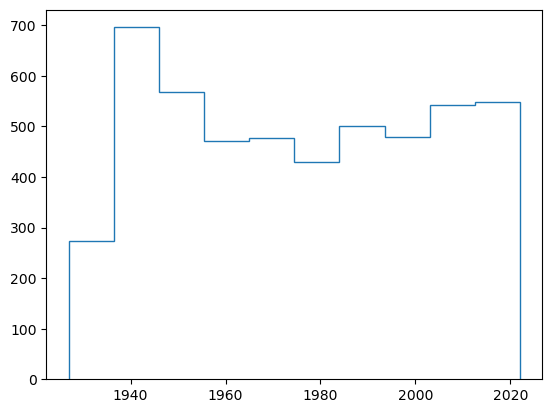

In [14]:
plt.hist(awards_condensed.year, histtype='step') 